In [22]:
import pandas as pd

# Load the data
df = pd.read_csv("Dataset/Data_Entry_2017_v2020.csv")
df.head()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [23]:
df["Finding Labels"].describe()

count         112120
unique           836
top       No Finding
freq           60361
Name: Finding Labels, dtype: object

In [24]:
df["Finding Labels"]

0                   Cardiomegaly
1         Cardiomegaly|Emphysema
2          Cardiomegaly|Effusion
3                     No Finding
4                         Hernia
                   ...          
112115            Mass|Pneumonia
112116                No Finding
112117                No Finding
112118                No Finding
112119                No Finding
Name: Finding Labels, Length: 112120, dtype: object

In [25]:
individual_label_counts = df["Finding Labels"].str.split("|").explode().value_counts()
individual_label_counts

Finding Labels
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64

In [26]:
import numpy as np
unique_labels, counts = np.unique(df["Finding Labels"], return_counts=True)

# Combine unique labels and counts into a dictionary for easier viewing
label_counts = dict(zip(unique_labels, counts))

print("Unique Labels and Counts:")

Unique Labels and Counts:


In [27]:
label_counts_df = pd.DataFrame({'Label': unique_labels, 'Count': counts})

In [28]:
label_counts_df.shape

(836, 2)

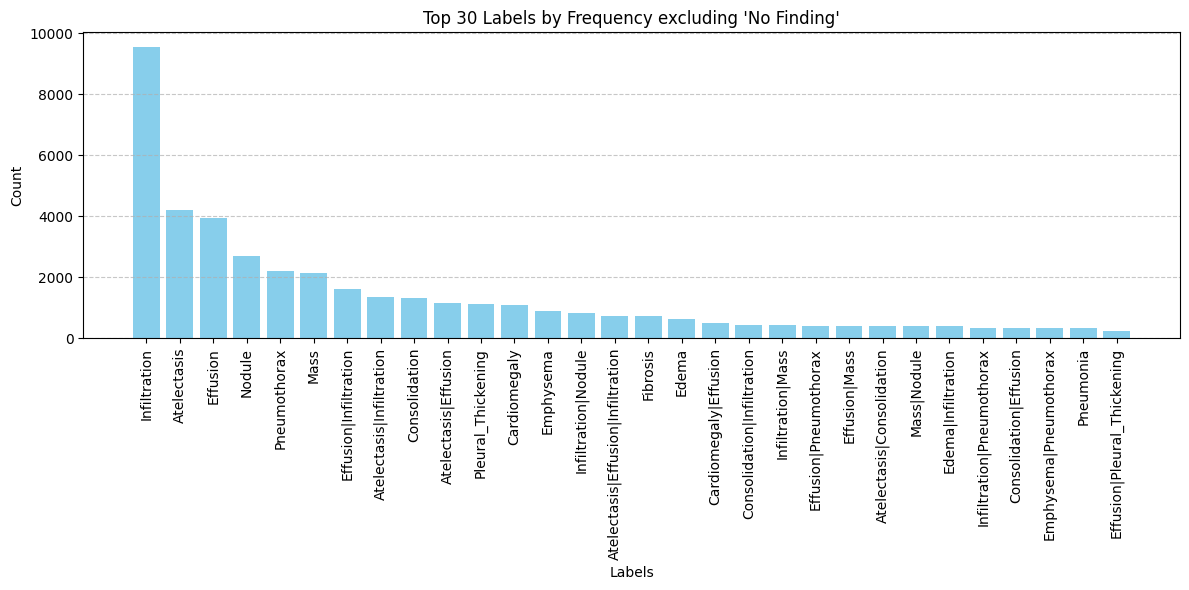

In [29]:
import matplotlib.pyplot as plt

# Exclude 'No Finding' and sort by count
label_counts_df1 = label_counts_df[label_counts_df['Label'] != 'No Finding']
sorted_counts = label_counts_df1.sort_values(by="Count", ascending=False)

# Select the top 30 labels
top_30 = sorted_counts.head(30)

# Plot the label distribution
plt.figure(figsize=(12, 6))
plt.bar(top_30['Label'], top_30['Count'], color='skyblue')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Top 30 Labels by Frequency excluding 'No Finding'")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [30]:
class_names = ['No Finding', 'Infiltration', 'Effusion', 'Atelectasis', 'Nodule',
               'Mass', 'Pneumothorax', 'Consolidation', 'Pleural_Thickening',
               'Cardiomegaly', 'Emphysema', 'Edema', 'Fibrosis', 'Pneumonia', 'Hernia']

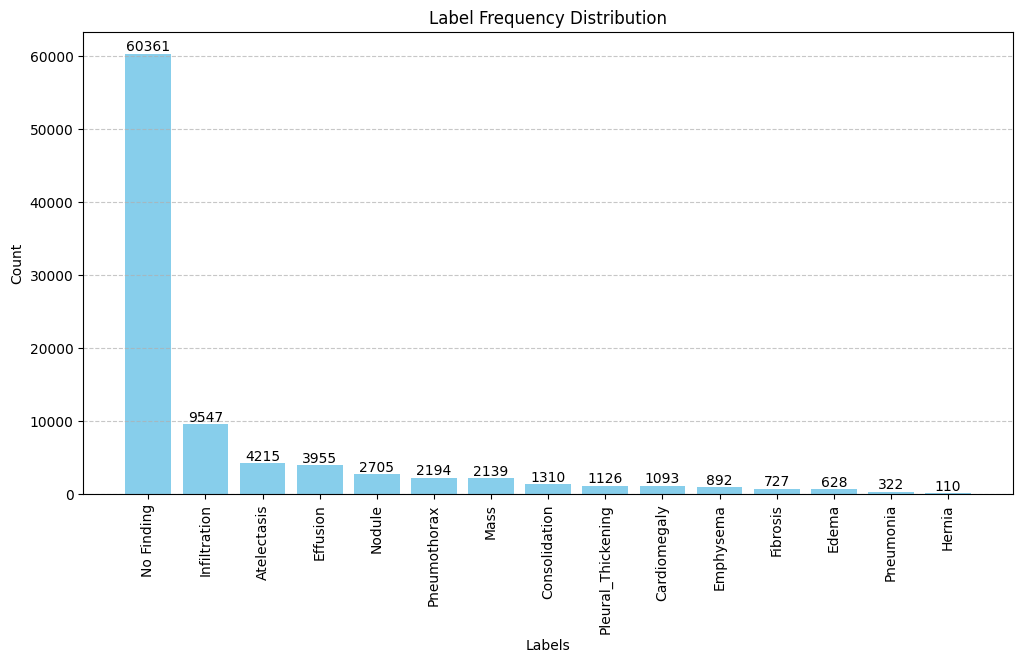

In [31]:
import matplotlib.pyplot as plt

# Filter and sort the DataFrame
sorted_counts = label_counts_df[label_counts_df['Label'].isin(class_names)].sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_counts['Label'], sorted_counts['Count'], color='skyblue')

# Annotate bars with count values
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate (bar height)
        int(bar.get_height()),  # Text (count value)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10  # Font size
    )

plt.xticks(rotation=90)
plt.title("Label Frequency Distribution")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Labels")
plt.show()


In [32]:
import pandas as pd

# Initialize a DataFrame for one-hot encoded labels
label_matrix = pd.DataFrame(0, index=df.index, columns=class_names)

# Split the `Finding Labels` column and update the label matrix
for index, row in df.iterrows():
    labels = row['Finding Labels'].split('|')
    for label in labels:
        if label in class_names:
            label_matrix.at[index, label] = 1

# Concatenate the one-hot encoded labels with the original DataFrame
df_with_labels = pd.concat([df, label_matrix], axis=1)

# Display the resulting DataFrame
print(df_with_labels)


             Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_001.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0 

In [33]:
df_with_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Mass,Pneumothorax,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Edema,Fibrosis,Pneumonia,Hernia
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,0,1,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,1,1,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,1,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,0
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,...,1,0,0,0,0,0,0,0,1,0
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Calculating the sum for each label (count of rows where value is 1)
label_counts = df_with_labels[class_names].sum()

# Display the counts
print(label_counts)

No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
dtype: int64


In [35]:

# Create a column that combines all labels for stratified splitting
df_with_labels['combined_labels'] = df_with_labels[class_names].apply(lambda x: ','.join(x.index[x == 1]), axis=1)

In [36]:
df_with_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumothorax,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Edema,Fibrosis,Pneumonia,Hernia,combined_labels
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,0,0,0,1,0,0,0,0,0,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,1,1,0,0,0,0,"Cardiomegaly,Emphysema"
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,1,0,0,0,0,0,"Effusion,Cardiomegaly"
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,No Finding
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,1,Hernia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,1,0,"Mass,Pneumonia"
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,No Finding
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,No Finding
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,0,No Finding


In [45]:
import pandas as pd
from sklearn.utils import resample

# Assuming your DataFrame is named df

# Step 1: Calculate the count for each individual label
individual_label_counts = df_with_labels["Finding Labels"].str.split("|").explode().value_counts()

# Step 2: Define the target minimum count for each label
min_count = 10000

# Step 3: Create an empty list to store the balanced samples
balanced_samples = []

# Step 4: Iterate over each unique label
for label, count in individual_label_counts.items():
    # Filter the rows that have the current label in the "Finding Labels" column
    label_samples = df_with_labels[df_with_labels["Finding Labels"].str.contains(label)]

    if count < min_count:
        # If the count is less than the minimum, oversample the data
        oversampled_label_samples = resample(label_samples,
                                             replace=True,    # Allow resampling with replacement
                                             n_samples=min_count,  # Ensure we reach the minimum count
                                             random_state=42)    # For reproducibility
        balanced_samples.append(oversampled_label_samples)
    else:
        # If the count is above the minimum, keep the original samples (or you can undersample if needed)
        balanced_samples.append(label_samples)

# Step 5: Combine the oversampled/undersampled data back into a single DataFrame
balanced_df = pd.concat(balanced_samples)

# Step 6: Optionally shuffle the final DataFrame if needed
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# You can now use `balanced_df` for training your model


In [46]:
balanced_df["Finding Labels"].str.split("|").explode().value_counts()

Finding Labels
No Finding            60361
Infiltration          53781
Effusion              43103
Atelectasis           34743
Mass                  22133
Nodule                20669
Consolidation         19789
Pneumothorax          19734
Pleural_Thickening    17622
Edema                 15996
Cardiomegaly          14825
Emphysema             14808
Pneumonia             13754
Fibrosis              12821
Hernia                10324
Name: count, dtype: int64

In [49]:
balanced_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumothorax,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Edema,Fibrosis,Pneumonia,Hernia,combined_labels
0,00002251_001.png,No Finding,9,2251,76,F,PA,2992,2991,0.143000,...,0,0,0,0,0,0,0,0,0,No Finding
1,00026024_025.png,Infiltration|Mass,25,26024,44,F,AP,3056,2544,0.139000,...,0,0,0,0,0,0,0,0,0,"Infiltration,Mass"
2,00027743_000.png,Infiltration|Mass|Nodule,0,27743,66,F,PA,2544,3056,0.139000,...,0,0,0,0,0,0,0,0,0,"Infiltration,Nodule,Mass"
3,00030740_001.png,Infiltration,1,30740,23,M,PA,2021,2021,0.194311,...,0,0,0,0,0,0,0,0,0,Infiltration
4,00030636_014.png,Atelectasis|Effusion|Pneumothorax,14,30636,45,M,PA,2021,2021,0.194311,...,1,0,0,0,0,0,0,0,0,"Effusion,Atelectasis,Pneumothorax"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215126,00001836_031.png,Atelectasis|Consolidation|Infiltration|Mass,31,1836,49,F,AP,2500,2048,0.168000,...,0,1,0,0,0,0,0,0,0,"Infiltration,Atelectasis,Mass,Consolidation"
215127,00025954_004.png,Atelectasis|Pneumothorax,4,25954,57,F,PA,2992,2991,0.143000,...,1,0,0,0,0,0,0,0,0,"Atelectasis,Pneumothorax"
215128,00016429_018.png,Atelectasis|Emphysema|Pneumothorax,10,16429,47,F,PA,2992,2991,0.143000,...,1,0,0,0,1,0,0,0,0,"Atelectasis,Pneumothorax,Emphysema"
215129,00006535_001.png,Pleural_Thickening,1,6535,36,M,PA,2048,2500,0.171000,...,0,0,1,0,0,0,0,0,0,Pleural_Thickening


In [50]:
final_samples = []
min_count = 10000
max_count = 15000

individual_label_counts = balanced_df["Finding Labels"].str.split("|").explode().value_counts()

# Iterate through each label
for label, count in individual_label_counts.items():
    # Filter the rows that have the current label
    label_samples = balanced_df[balanced_df["Finding Labels"].str.contains(label)]
    
    # Oversample labels with less than 10,000 samples
    if count < min_count:
        oversampled_label_samples = resample(label_samples,
                                             replace=True,     # Sample with replacement
                                             n_samples=min_count,   # Ensure the minimum count
                                             random_state=42)   # For reproducibility
        final_samples.append(oversampled_label_samples)
    
    # Undersample labels with more than 15,000 samples to exactly 15,000
    elif count > max_count:
        undersampled_label_samples = resample(label_samples,
                                              replace=False,     # No replacement
                                              n_samples=max_count,   # Cap at 15,000 samples
                                              random_state=42)   # For reproducibility
        final_samples.append(undersampled_label_samples)
    
    # Keep labels between 10,000 and 15,000 unchanged
    else:
        final_samples.append(label_samples)

# Combine the adjusted samples
balanced_df_final = pd.concat(final_samples)

# Shuffle the final dataset
balanced_df_final = balanced_df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the label counts
final_label_counts = balanced_df_final["Finding Labels"].str.split("|").explode().value_counts()
print(final_label_counts)


Finding Labels
Infiltration          72486
Effusion              66050
Atelectasis           52476
Mass                  38778
Consolidation         35015
Nodule                34190
Pneumothorax          33575
Pleural_Thickening    33038
Edema                 29610
Emphysema             27623
Cardiomegaly          26285
Pneumonia             25851
Fibrosis              21691
Hernia                15211
No Finding            15000
Name: count, dtype: int64


C:\Users\Kavitha padala\AppData\Local\Temp\ipykernel_25692\500417864.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


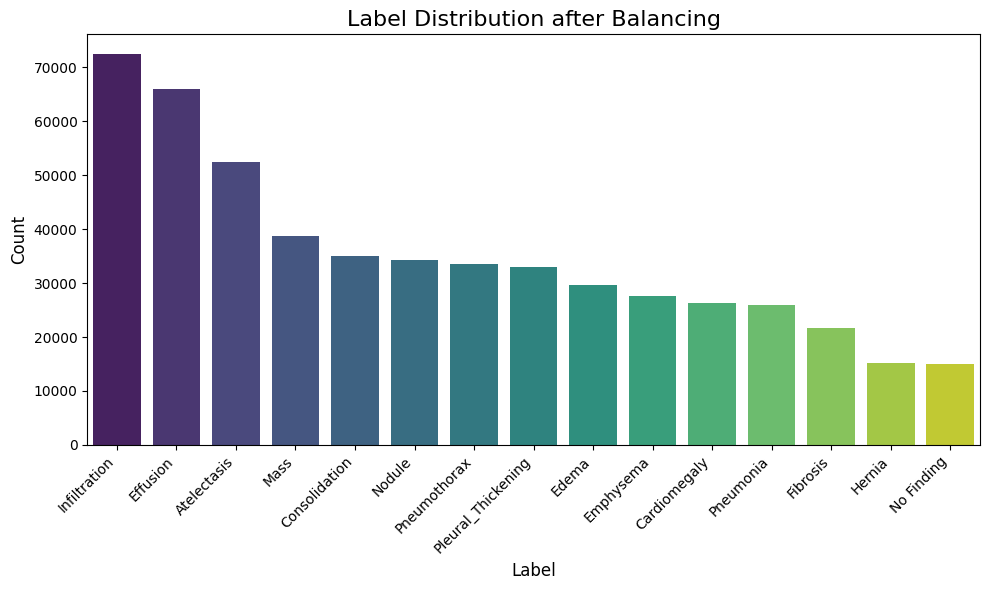

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get the label distribution after balancing
label_counts = balanced_df_final["Finding Labels"].str.split("|").explode().value_counts()

# Step 2: Create a bar plot of the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Step 3: Customize the plot
plt.title('Label Distribution after Balancing', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping

# Step 4: Show the plot
plt.show()


In [52]:
balanced_df_final

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumothorax,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Edema,Fibrosis,Pneumonia,Hernia,combined_labels
0,00012973_005.png,Edema|Effusion|Infiltration|Mass,5,12973,58,M,AP,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,"Infiltration,Effusion,Mass,Edema"
1,00011436_001.png,Effusion|Pleural_Thickening,1,11436,54,M,PA,2762,2905,0.143,...,0,0,1,0,0,0,0,0,0,"Effusion,Pleural_Thickening"
2,00008694_004.png,Hernia,4,8694,55,F,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,0,1,Hernia
3,00022764_002.png,Atelectasis|Effusion|Infiltration,5,22764,70,M,PA,3056,2544,0.139,...,0,0,0,0,0,0,0,0,0,"Infiltration,Effusion,Atelectasis"
4,00012848_011.png,Atelectasis|Effusion|Infiltration|Pneumonia,11,12848,43,M,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,1,0,"Infiltration,Effusion,Atelectasis,Pneumonia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216527,00001248_038.png,Atelectasis|Effusion|Infiltration|Pneumothorax,20,1248,33,F,PA,2992,2991,0.143,...,1,0,0,0,0,0,0,0,0,"Infiltration,Effusion,Atelectasis,Pneumothorax"
216528,00011237_027.png,Cardiomegaly|Consolidation|Mass,28,11237,55,F,AP,2500,2048,0.168,...,0,1,0,1,0,0,0,0,0,"Mass,Consolidation,Cardiomegaly"
216529,00020680_005.png,Atelectasis|Consolidation|Nodule|Pleural_Thick...,5,20680,51,M,PA,2550,2991,0.143,...,1,1,1,0,0,0,0,0,0,"Atelectasis,Nodule,Pneumothorax,Consolidation,..."
216530,00022672_002.png,Cardiomegaly|Consolidation|Edema|Effusion|Pleu...,2,22672,66,F,AP,3056,2544,0.139,...,0,1,1,1,0,1,0,0,0,"Effusion,Consolidation,Pleural_Thickening,Card..."


In [54]:
from sklearn.model_selection import train_test_split

# Create a stratification column: count the number of positive labels per row
balanced_df_final['stratify_col'] = balanced_df_final[class_names].sum(axis=1)

# Perform stratified split based on the `stratify_col`
train_data, test_data = train_test_split(
    balanced_df_final, 
    test_size=0.3, 
    random_state=42, 
    stratify=balanced_df_final['stratify_col']  # Use stratify argument here
)

# Drop the stratify_col after splitting
train_data = train_data.drop(columns=['stratify_col'])
test_data = test_data.drop(columns=['stratify_col'])

# Check label distributions
print("Train Data Distribution:\n", train_data[class_names].sum())
print("\nTest Data Distribution:\n", test_data[class_names].sum())



Train Data Distribution:
 No Finding            10537
Infiltration          50707
Effusion              46067
Atelectasis           36768
Nodule                23972
Mass                  27110
Pneumothorax          23629
Consolidation         24605
Pleural_Thickening    23112
Cardiomegaly          18423
Emphysema             19406
Edema                 20714
Fibrosis              15146
Pneumonia             18017
Hernia                10603
dtype: int64

Test Data Distribution:
 No Finding             4463
Infiltration          21779
Effusion              19983
Atelectasis           15708
Nodule                10218
Mass                  11668
Pneumothorax           9946
Consolidation         10410
Pleural_Thickening     9926
Cardiomegaly           7862
Emphysema              8217
Edema                  8896
Fibrosis               6545
Pneumonia              7834
Hernia                 4608
dtype: int64


In [55]:
# Perform a 50-50 split on the test_data to create valid_data and test_data
valid_data, test_data = train_test_split(
    test_data, 
    test_size=0.5,  # 50% of the data will go into test_data, the rest into valid_data
    random_state=42, 
    shuffle=True
)

# Check the distribution in the valid_data and test_data
print("Validation Data Distribution:\n", valid_data[class_names].sum())
print("\nTest Data Distribution:\n", test_data[class_names].sum())

Validation Data Distribution:
 No Finding             2223
Infiltration          10874
Effusion               9961
Atelectasis            7878
Nodule                 5106
Mass                   5884
Pneumothorax           4997
Consolidation          5204
Pleural_Thickening     4952
Cardiomegaly           3846
Emphysema              4155
Edema                  4441
Fibrosis               3261
Pneumonia              3926
Hernia                 2301
dtype: int64

Test Data Distribution:
 No Finding             2240
Infiltration          10905
Effusion              10022
Atelectasis            7830
Nodule                 5112
Mass                   5784
Pneumothorax           4949
Consolidation          5206
Pleural_Thickening     4974
Cardiomegaly           4016
Emphysema              4062
Edema                  4455
Fibrosis               3284
Pneumonia              3908
Hernia                 2307
dtype: int64


In [56]:
import os
from glob import glob  # Ensure you're importing the `glob` function
# Function to create the 'labels' column
def convert_to_multi_hot_encoding(data, class_names):
    # Create a list of labels (binary values) for each image
     # Fetching all image paths
    all_image_paths = {os.path.basename(x): x for x in 
                       glob(os.path.join('.', 'Dataset', 'images', 'images_*', 'images', '*.png'))}
    
    # Mapping image paths and creating labels
    data['images'] = data['Image Index'].map(all_image_paths.get)
    data['labels'] = data[class_names].values.tolist()
    
    # Return only the 'labels' column
    return data[['images','labels']]

# Applying the function to create the 'labels' column in train, test, and valid data
train = convert_to_multi_hot_encoding(train_data, class_names)
test = convert_to_multi_hot_encoding(test_data, class_names)
valid = convert_to_multi_hot_encoding(valid_data, class_names)

# Check the result
print(train[['images','labels']].head())
print(test[['images','labels']].head())
print(valid[['images','labels']].head())


                                                   images  \
26352   .\Dataset\images\images_006\images\00012087_02...   
157012  .\Dataset\images\images_006\images\00012935_01...   
192614  .\Dataset\images\images_006\images\00013380_00...   
159342  .\Dataset\images\images_004\images\00007670_03...   
31291   .\Dataset\images\images_012\images\00028341_00...   

                                               labels  
26352   [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]  
157012  [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]  
192614  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]  
159342  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
31291   [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]  
                                                   images  \
112354  .\Dataset\images\images_001\images\00000778_00...   
202798  .\Dataset\images\images_009\images\00020318_02...   
143352  .\Dataset\images\images_009\images\00020427_01...   
6156    .\Dataset\images\images_004\images\00006774_0

In [57]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# Custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        image_path = os.path.join(self.image_dir, img_name)
        image = Image.open(image_path).convert("RGB")  # Convert to RGB if needed
        labels = torch.tensor(self.dataframe.iloc[idx, -1], dtype=torch.float32)  # Convert label list to tensor

        if self.transform:
            image = self.transform(image)

        return image, labels

# Data augmentation and normalization for training
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224 (ViT input size)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])

# Create dataset and dataloaders
train_dataset = CustomImageDataset(train, image_dir=".", transform=transform)  # Adjust path as needed
test_dataset = CustomImageDataset(test, image_dir=".", transform=transform)  # Adjust path as needed
valid_dataset = CustomImageDataset(valid, image_dir=".", transform=transform)  # Adjust path as needed

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


## Data Augumentation

In [58]:
from torchvision import transforms

# Data augmentation for training (random transformations)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to ViT's input size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(15),  # Random rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),  # Random affine transformation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

# For validation and test data (no augmentation, only resizing and normalization)
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = valid_transform


In [59]:
# Create datasets with the appropriate transformations
train_dataset = CustomImageDataset(train, image_dir=".", transform=train_transform)
valid_dataset = CustomImageDataset(valid, image_dir=".", transform=valid_transform)
test_dataset = CustomImageDataset(test, image_dir=".", transform=test_transform)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


## Model Training

In [60]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

# Load pre-trained Vision Transformer (ViT) model from Hugging Face
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=15)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [61]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [62]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [63]:
import torch
from torch.optim import AdamW
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm  # For progress bars

# Define the Focal Loss class
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):
        prob = torch.sigmoid(logits)
        targets = targets.float()
        bce_loss = nn.BCEWithLogitsLoss(reduction='none')(logits, targets)
        p_t = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * bce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Initialize model, optimizer, and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = FocalLoss(alpha=1, gamma=2, reduction='mean')
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, verbose=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 5
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Training loop with progress bar
    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Training]")
    for images, labels in train_pbar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.sigmoid(outputs) >= 0.5
        correct_predictions += (preds == labels).sum().item()
        total_samples += labels.size(0) * labels.size(1)

        # Update the progress bar
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_samples * 100

    # Validation loop with progress bar
    model.eval()
    val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0

    valid_pbar = tqdm(valid_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Validation]")
    with torch.no_grad():
        for images, labels in valid_pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits

            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = torch.sigmoid(outputs) >= 0.5
            correct_val_predictions += (preds == labels).sum().item()
            total_val_samples += labels.size(0) * labels.size(1)

            # Update the progress bar
            valid_pbar.set_postfix(loss=f"{loss.item():.4f}")

    avg_val_loss = val_loss / len(valid_loader)
    val_accuracy = correct_val_predictions / total_val_samples * 100
    scheduler.step(avg_val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.2f}%, "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {avg_val_loss:.4f}. Saving model.")
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model_new_try.pth')


Epoch 1/5 [Training]:   0%|                                                                   | 0/4737 [00:00<?, ?it/s]C:\Users\Kavitha padala\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\vit\modeling_vit.py:277: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  context_layer = torch.nn.functional.scaled_dot_product_attention(
Epoch 1/5 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [21:49<00:00,  1.29s/it, loss=0.0805]


Epoch [1/5], Train Loss: 0.0913, Train Accuracy: 85.45%, Validation Loss: 0.0816, Validation Accuracy: 86.70%
Validation loss improved from inf to 0.0816. Saving model.


Epoch 2/5 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [21:55<00:00,  1.30s/it, loss=0.0670]


Epoch [2/5], Train Loss: 0.0748, Train Accuracy: 88.04%, Validation Loss: 0.0688, Validation Accuracy: 89.01%
Validation loss improved from 0.0816 to 0.0688. Saving model.


Epoch 3/5 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [21:08<00:00,  1.25s/it, loss=0.0576]


Epoch [3/5], Train Loss: 0.0625, Train Accuracy: 90.34%, Validation Loss: 0.0579, Validation Accuracy: 91.13%
Validation loss improved from 0.0688 to 0.0579. Saving model.


Epoch 4/5 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [23:12<00:00,  1.37s/it, loss=0.0444]


Epoch [4/5], Train Loss: 0.0516, Train Accuracy: 92.37%, Validation Loss: 0.0484, Validation Accuracy: 92.95%
Validation loss improved from 0.0579 to 0.0484. Saving model.


Epoch 5/5 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [21:41<00:00,  1.28s/it, loss=0.0350]


Epoch [5/5], Train Loss: 0.0425, Train Accuracy: 93.98%, Validation Loss: 0.0410, Validation Accuracy: 94.28%
Validation loss improved from 0.0484 to 0.0410. Saving model.


## testing

Testing: 100%|████████████████████████████████████████████████████████| 1015/1015 [22:37<00:00,  1.34s/it, loss=0.0377]


Average Test Loss: 0.0408
Test Accuracy: 94.30%

Classification Report:


C:\Users\Kavitha padala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    precision    recall  f1-score   support

        No Finding       0.62      0.25      0.36      2240
      Infiltration       0.85      0.65      0.74     10905
          Effusion       0.88      0.79      0.83     10022
       Atelectasis       0.84      0.71      0.77      7830
            Nodule       0.81      0.72      0.76      5112
              Mass       0.89      0.81      0.84      5784
      Pneumothorax       0.92      0.78      0.84      4949
     Consolidation       0.78      0.78      0.78      5206
Pleural_Thickening       0.90      0.77      0.83      4974
      Cardiomegaly       0.92      0.85      0.89      4016
         Emphysema       0.93      0.84      0.88      4062
             Edema       0.96      0.76      0.85      4455
          Fibrosis       0.94      0.71      0.81      3284
         Pneumonia       0.94      0.85      0.90      3908
            Hernia       1.00      1.00      1.00      2307

         micro avg       0.88      0.7

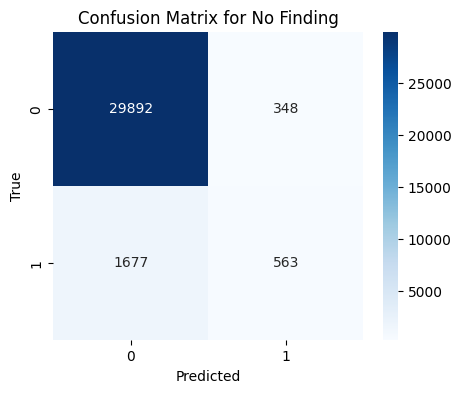

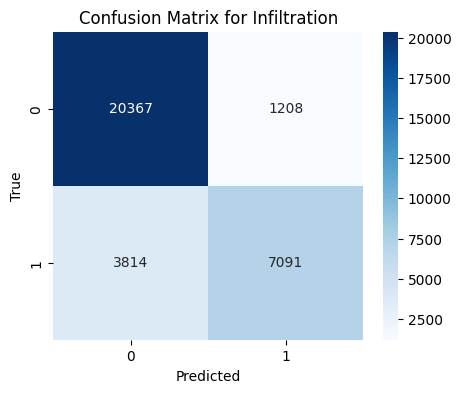

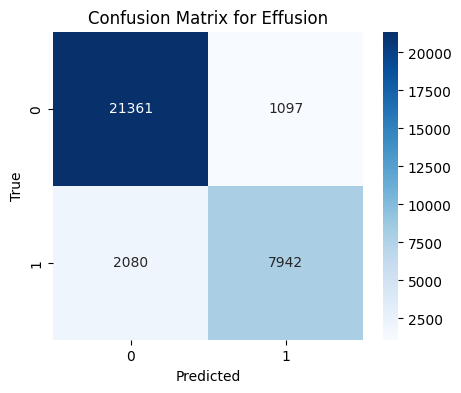

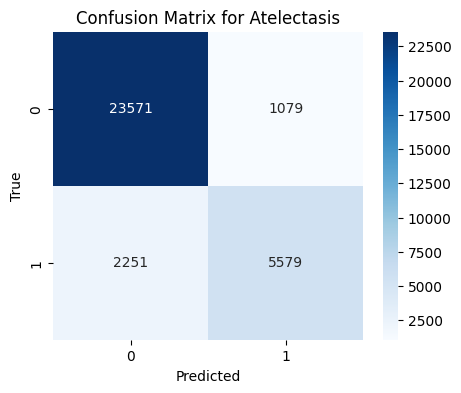

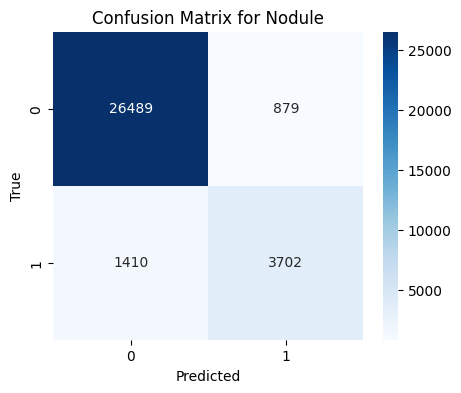

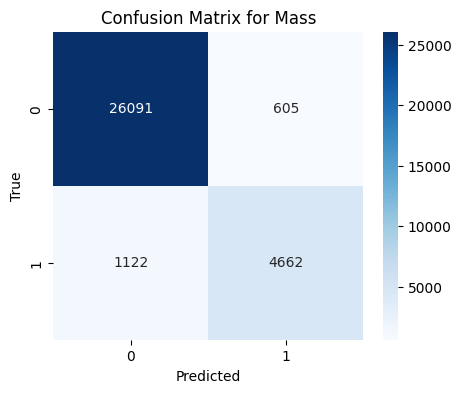

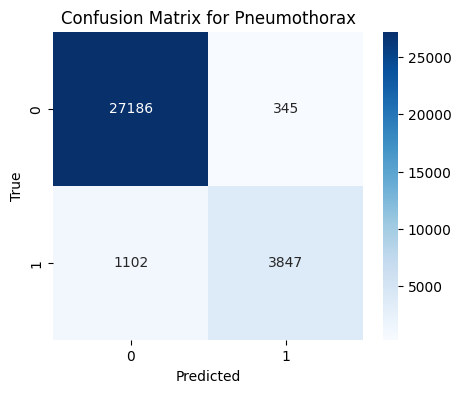

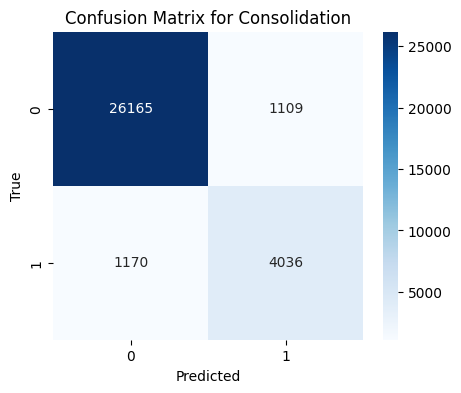

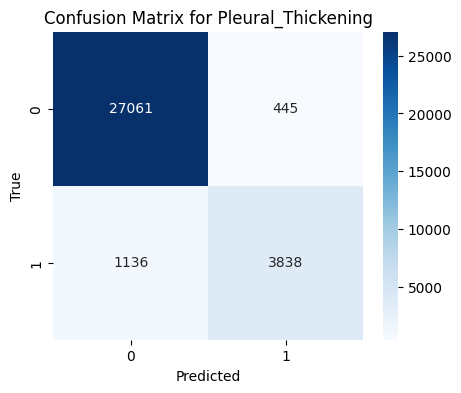

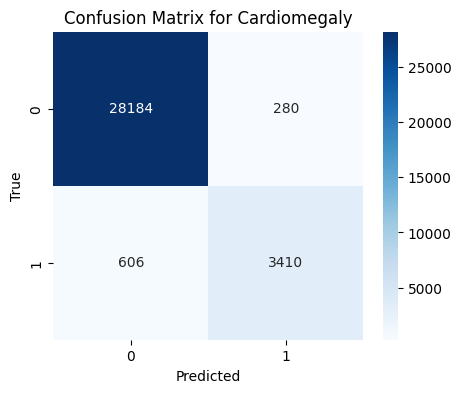

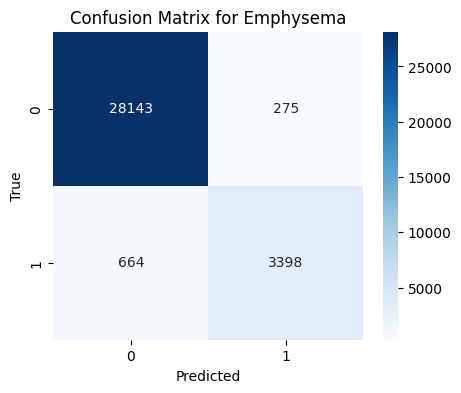

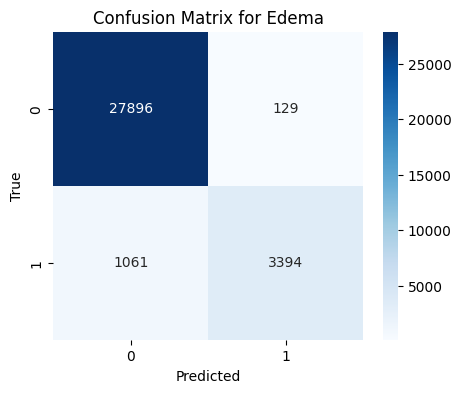

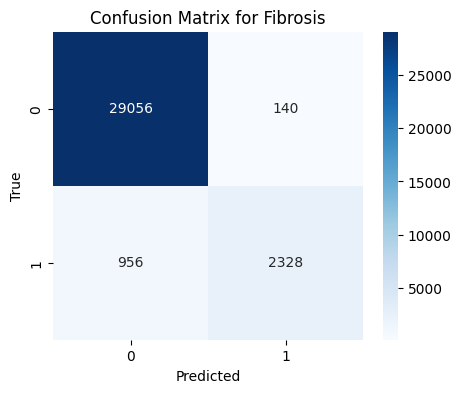

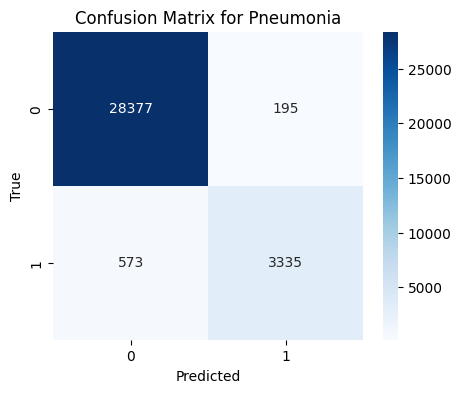

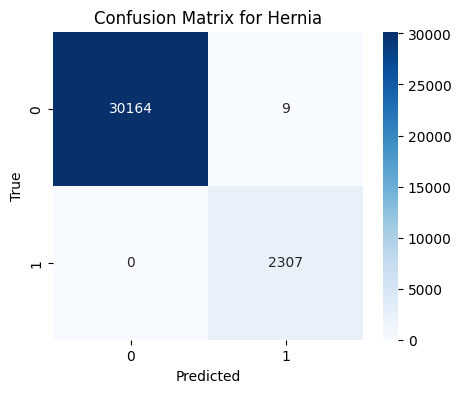

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Misclassified Samples:


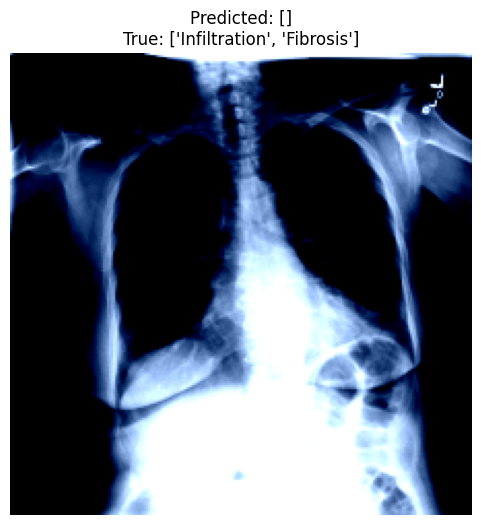

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


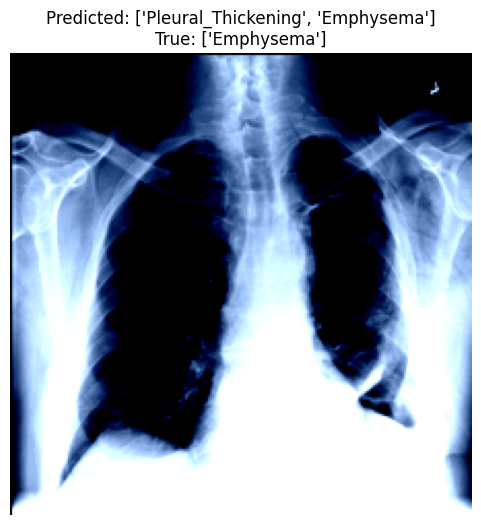

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


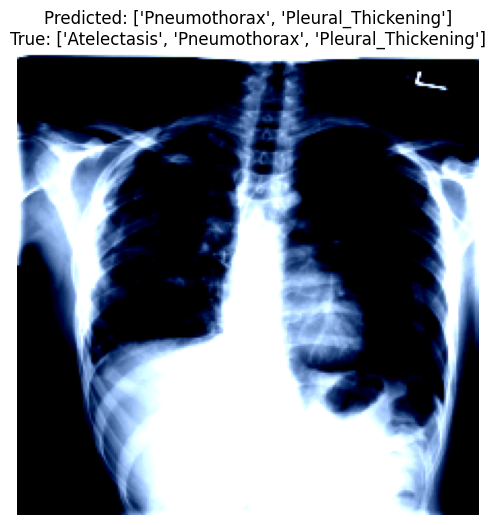

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


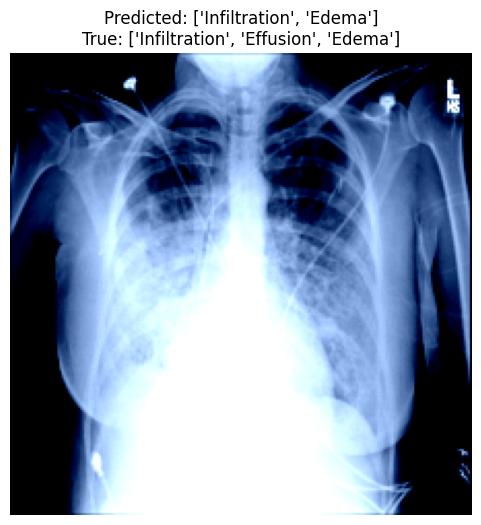

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


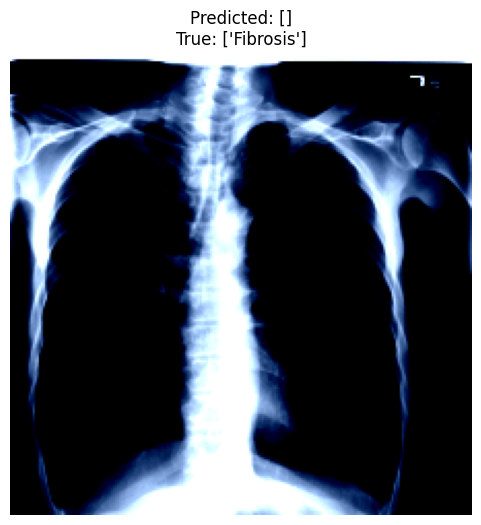

NameError: name 'train_loss' is not defined

<Figure size 1000x600 with 0 Axes>

In [64]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from tqdm import tqdm

# Initialize variables
test_loss = 0.0
correct_test_predictions = 0
total_test_samples = 0

# Track predictions and true labels
all_preds = []
all_labels = []
misclassified_samples = []

# No gradients needed during testing
model.eval()
with torch.no_grad():
    test_pbar = tqdm(test_loader, desc="Testing")
    for images, labels in test_pbar:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Predictions with threshold
        preds = torch.sigmoid(outputs) >= 0.5
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

        # Track misclassified samples
        for i in range(images.size(0)):
            if not torch.equal(preds[i], labels[i]):
                misclassified_samples.append((images[i].cpu(), preds[i].cpu(), labels[i].cpu()))

        # Correct predictions
        correct_test_predictions += (preds == labels).sum().item()
        total_test_samples += labels.size(0) * labels.size(1)

        # Update progress bar
        test_pbar.set_postfix(loss=f"{loss.item():.4f}")

     

# Combine all predictions and labels
all_preds = torch.cat(all_preds, dim=0)
all_labels = torch.cat(all_labels, dim=0)

# Calculate metrics
avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct_test_predictions / total_test_samples * 100
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(all_labels.numpy(), all_preds.numpy())
for i, matrix in enumerate(conf_matrix):
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {class_names[i]}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot misclassified images
print("\nMisclassified Samples:")
for image, pred, true in misclassified_samples[:5]:  # Display up to 5 examples
    plt.figure(figsize=(6, 6))
    if image.shape[0] == 3:  # RGB image
        plt.imshow(image.permute(1, 2, 0))  # Convert from tensor format
    else:  # Grayscale image
        plt.imshow(image.squeeze(0), cmap='gray')  # Squeeze channel dimension
    plt.axis('off')
    plt.title(f"Predicted: {[class_names[i] for i, p in enumerate(pred) if p == 1]}\n"
              f"True: {[class_names[i] for i, t in enumerate(true) if t == 1]}")
    plt.show()

# Plot loss curve (example: using `train_loss` and `val_loss` lists from training)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Train Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


 ## Retraining the misclassified class
 ## No Finding 

C:\Users\Kavitha padala\AppData\Local\Temp\ipykernel_25692\500417864.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


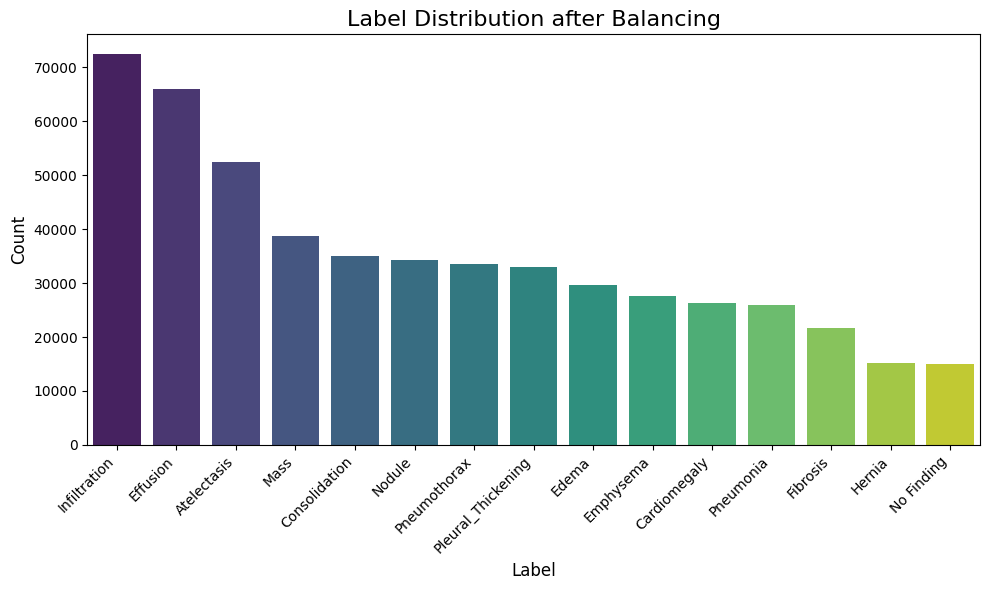

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get the label distribution after balancing
label_counts = balanced_df_final["Finding Labels"].str.split("|").explode().value_counts()

# Step 2: Create a bar plot of the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Step 3: Customize the plot
plt.title('Label Distribution after Balancing', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent clipping

# Step 4: Show the plot
plt.show()


In [66]:
balanced_df_final["Finding Labels"].str.split("|").explode().value_counts()


Finding Labels
Infiltration          72486
Effusion              66050
Atelectasis           52476
Mass                  38778
Consolidation         35015
Nodule                34190
Pneumothorax          33575
Pleural_Thickening    33038
Edema                 29610
Emphysema             27623
Cardiomegaly          26285
Pneumonia             25851
Fibrosis              21691
Hernia                15211
No Finding            15000
Name: count, dtype: int64

In [69]:
import pandas as pd

# Your dataset
# Assuming `balanced_df_final` contains the dataset with "Finding Labels" column
# and each row represents a sample with labels separated by '|'.

# Define target labels
target_labels = ["No Finding", "Infiltration", "Atelectasis", "Nodule"]

# Filter rows containing the target labels
filtered_data = df[df["Finding Labels"]
                                  .str.split("|")
                                  .apply(lambda labels: any(label in target_labels for label in labels))]

# Explode the labels to analyze counts and ensure filtering is correct
filtered_data_exploded = filtered_data["Finding Labels"].str.split("|").explode()

# Print filtered counts for verification
print("Filtered label counts:")
print(filtered_data_exploded.value_counts())

# Save the filtered dataset (optional)



Filtered label counts:
Finding Labels
No Finding            60361
Infiltration          19894
Atelectasis           11559
Effusion               6533
Nodule                 6331
Consolidation          2366
Mass                   2293
Pneumothorax           1729
Pleural_Thickening     1345
Edema                  1161
Cardiomegaly            877
Emphysema               824
Pneumonia               821
Fibrosis                636
Hernia                   74
Name: count, dtype: int64


In [70]:
individual_label_counts = df["Finding Labels"].str.split("|").explode().value_counts()
individual_label_counts

Finding Labels
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64

In [71]:
import pandas as pd

# Assuming `df` contains the dataset with "Finding Labels" column.

# Define the target count for undersampling
undersample_target_count = 25000

# Separate rows with "No Finding" and other rows
no_finding_rows = df[df["Finding Labels"].str.contains("No Finding")]
other_rows = df[~df["Finding Labels"].str.contains("No Finding")]

# Randomly sample from "No Finding" rows to undersample
undersampled_no_finding = no_finding_rows.sample(n=undersample_target_count, random_state=42)

# Combine the undersampled "No Finding" rows with the other rows
undersampled_df = pd.concat([undersampled_no_finding, other_rows], ignore_index=True)

# Shuffle the resulting dataset
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class counts
individual_label_counts = undersampled_df["Finding Labels"].str.split("|").explode().value_counts()
print(individual_label_counts)


Finding Labels
No Finding            25000
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


In [72]:
import pandas as pd

# Initialize a DataFrame for one-hot encoded labels
label_matrix = pd.DataFrame(0, index=undersampled_df.index, columns=class_names)

# Split the `Finding Labels` column and update the label matrix
for index, row in undersampled_df.iterrows():
    labels = row['Finding Labels'].split('|')
    for label in labels:
        if label in class_names:
            label_matrix.at[index, label] = 1

# Concatenate the one-hot encoded labels with the original DataFrame
df_with_labels = pd.concat([undersampled_df, label_matrix], axis=1)

# Display the resulting DataFrame
print(df_with_labels)


            Image Index                            Finding Labels  \
0      00016308_004.png                                No Finding   
1      00024976_001.png                                No Finding   
2      00026451_026.png  Cardiomegaly|Effusion|Pleural_Thickening   
3      00022191_000.png                              Infiltration   
4      00029380_004.png                              Infiltration   
...                 ...                                       ...   
76754  00007622_002.png                     Effusion|Infiltration   
76755  00007056_013.png                                No Finding   
76756  00016732_014.png        Atelectasis|Consolidation|Effusion   
76757  00009669_007.png                                No Finding   
76758  00001296_000.png                                No Finding   

       Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
0                4       16308           45              M            AP   
1                1 

In [73]:

# Create a column that combines all labels for stratified splitting
df_with_labels['combined_labels'] = df_with_labels[class_names].apply(lambda x: ','.join(x.index[x == 1]), axis=1)

In [74]:
df_with_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Pneumothorax,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Edema,Fibrosis,Pneumonia,Hernia,combined_labels
0,00016308_004.png,No Finding,4,16308,45,M,AP,2500,2048,0.168000,...,0,0,0,0,0,0,0,0,0,No Finding
1,00024976_001.png,No Finding,1,24976,50,F,PA,2992,2991,0.143000,...,0,0,0,0,0,0,0,0,0,No Finding
2,00026451_026.png,Cardiomegaly|Effusion|Pleural_Thickening,26,26451,51,M,AP,3056,2544,0.139000,...,0,0,1,1,0,0,0,0,0,"Effusion,Pleural_Thickening,Cardiomegaly"
3,00022191_000.png,Infiltration,0,22191,53,M,PA,2992,2991,0.143000,...,0,0,0,0,0,0,0,0,0,Infiltration
4,00029380_004.png,Infiltration,4,29380,43,F,PA,1865,1877,0.194311,...,0,0,0,0,0,0,0,0,0,Infiltration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76754,00007622_002.png,Effusion|Infiltration,2,7622,14,M,AP,2500,2048,0.168000,...,0,0,0,0,0,0,0,0,0,"Infiltration,Effusion"
76755,00007056_013.png,No Finding,13,7056,56,M,PA,2500,2048,0.168000,...,0,0,0,0,0,0,0,0,0,No Finding
76756,00016732_014.png,Atelectasis|Consolidation|Effusion,14,16732,79,F,AP,2500,2048,0.168000,...,0,1,0,0,0,0,0,0,0,"Effusion,Atelectasis,Consolidation"
76757,00009669_007.png,No Finding,7,9669,38,M,AP,2500,2048,0.168000,...,0,0,0,0,0,0,0,0,0,No Finding


In [75]:
import os
from glob import glob  # Ensure you're importing the `glob` function
# Function to create the 'labels' column
def convert_to_multi_hot_encoding(data, class_names):
    # Create a list of labels (binary values) for each image
     # Fetching all image paths
    all_image_paths = {os.path.basename(x): x for x in 
                       glob(os.path.join('.', 'Dataset', 'images', 'images_*', 'images', '*.png'))}
    
    # Mapping image paths and creating labels
    data['images'] = data['Image Index'].map(all_image_paths.get)
    data['labels'] = data[class_names].values.tolist()
    
    # Return only the 'labels' column
    return data[['images','labels']]

# Applying the function to create the 'labels' column in train, test, and valid data
train1 = convert_to_multi_hot_encoding(df_with_labels, class_names)


# Check the result
print(train1[['images','labels']].head())


                                              images  \
0  .\Dataset\images\images_008\images\00016308_00...   
1  .\Dataset\images\images_011\images\00024976_00...   
2  .\Dataset\images\images_011\images\00026451_02...   
3  .\Dataset\images\images_010\images\00022191_00...   
4  .\Dataset\images\images_012\images\00029380_00...   

                                          labels  
0  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
2  [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]  
3  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
4  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  


In [76]:
from torchvision import transforms

# Data augmentation for training (random transformations)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to ViT's input size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(15),  # Random rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),  # Random affine transformation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

# Create datasets with the appropriate transformations
train_dataset1 = CustomImageDataset(train1, image_dir=".", transform=train_transform)

# Create DataLoader objects
train_loader1 = DataLoader(train_dataset1, batch_size=32, shuffle=True)



In [77]:
import torch
from torch.optim import AdamW
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm  # For progress bars

# Define the Focal Loss class
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):
        prob = torch.sigmoid(logits)
        targets = targets.float()
        bce_loss = nn.BCEWithLogitsLoss(reduction='none')(logits, targets)
        p_t = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * bce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Initialize model, optimizer, and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = FocalLoss(alpha=1, gamma=2, reduction='mean')
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, verbose=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 3
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Training loop with progress bar
    train_pbar = tqdm(train_loader1, desc=f"Epoch {epoch + 1}/{num_epochs} [Training]")
    for images, labels in train_pbar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.sigmoid(outputs) >= 0.5
        correct_predictions += (preds == labels).sum().item()
        total_samples += labels.size(0) * labels.size(1)

        # Update the progress bar
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_samples * 100

    # Validation loop with progress bar
    model.eval()
    val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0

    valid_pbar = tqdm(valid_loader, desc=f"Epoch {epoch + 1}/{num_epochs} [Validation]")
    with torch.no_grad():
        for images, labels in valid_pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits

            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = torch.sigmoid(outputs) >= 0.5
            correct_val_predictions += (preds == labels).sum().item()
            total_val_samples += labels.size(0) * labels.size(1)

            # Update the progress bar
            valid_pbar.set_postfix(loss=f"{loss.item():.4f}")

    avg_val_loss = val_loss / len(valid_loader)
    val_accuracy = correct_val_predictions / total_val_samples * 100
    scheduler.step(avg_val_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.2f}%, "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {avg_val_loss:.4f}. Saving model.")
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model_new_retrain.pth')


Epoch 1/3 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [22:56<00:00,  1.36s/it, loss=0.0532]


Epoch [1/3], Train Loss: 0.0255, Train Accuracy: 92.23%, Validation Loss: 0.0552, Validation Accuracy: 90.94%
Validation loss improved from inf to 0.0552. Saving model.


Epoch 2/3 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [22:27<00:00,  1.33s/it, loss=0.0502]


Epoch [2/3], Train Loss: 0.0245, Train Accuracy: 92.49%, Validation Loss: 0.0508, Validation Accuracy: 91.75%
Validation loss improved from 0.0552 to 0.0508. Saving model.


Epoch 3/3 [Validation]: 100%|█████████████████████████████████████████| 1015/1015 [22:57<00:00,  1.36s/it, loss=0.0424]


Epoch [3/3], Train Loss: 0.0237, Train Accuracy: 92.69%, Validation Loss: 0.0466, Validation Accuracy: 92.66%
Validation loss improved from 0.0508 to 0.0466. Saving model.


Testing: 100%|████████████████████████████████████████████████████████| 1015/1015 [22:58<00:00,  1.36s/it, loss=0.0402]


Average Test Loss: 0.0466
Test Accuracy: 92.64%

Classification Report:


C:\Users\Kavitha padala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                    precision    recall  f1-score   support

        No Finding       0.46      0.53      0.49      2240
      Infiltration       0.92      0.48      0.63     10905
          Effusion       0.89      0.71      0.79     10022
       Atelectasis       0.90      0.61      0.72      7830
            Nodule       0.95      0.41      0.57      5112
              Mass       0.94      0.70      0.80      5784
      Pneumothorax       0.90      0.76      0.83      4949
     Consolidation       0.96      0.46      0.62      5206
Pleural_Thickening       0.98      0.50      0.66      4974
      Cardiomegaly       0.97      0.72      0.83      4016
         Emphysema       0.97      0.63      0.76      4062
             Edema       0.98      0.61      0.75      4455
          Fibrosis       0.97      0.51      0.67      3284
         Pneumonia       0.98      0.68      0.80      3908
            Hernia       1.00      0.94      0.97      2307

         micro avg       0.91      0.6

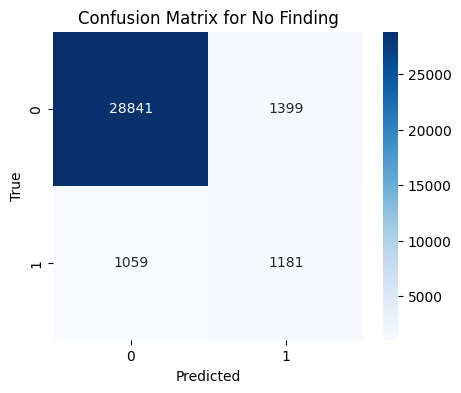

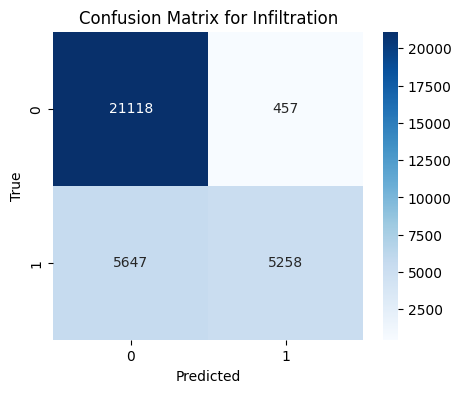

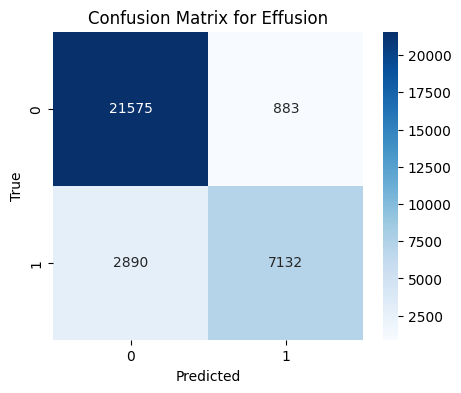

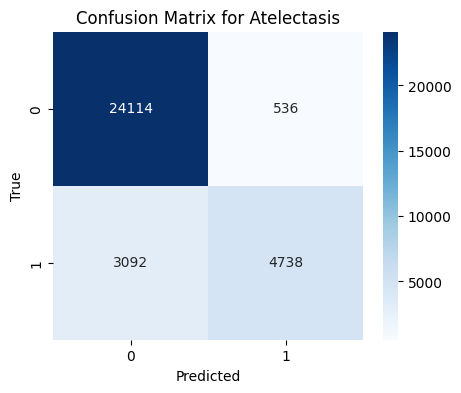

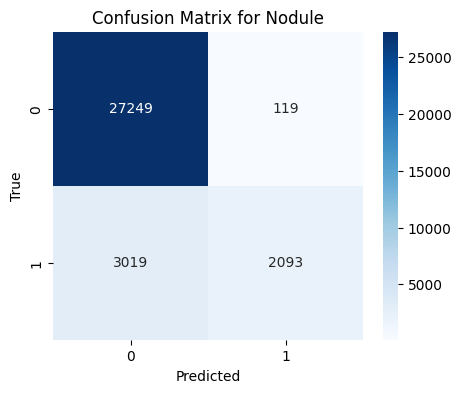

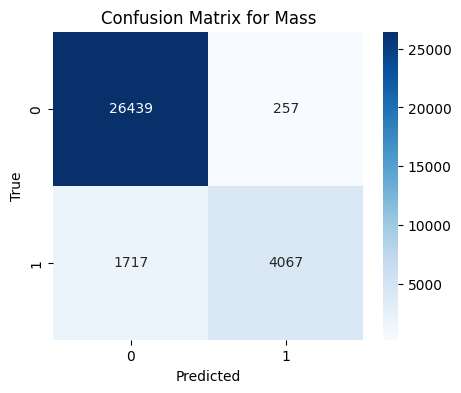

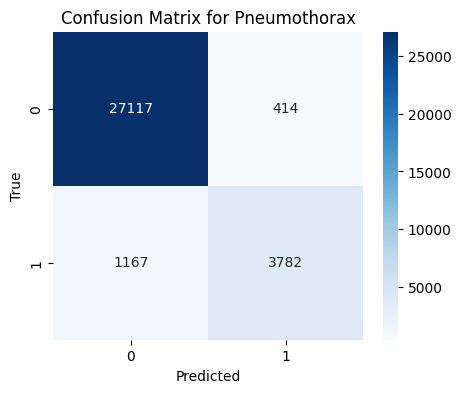

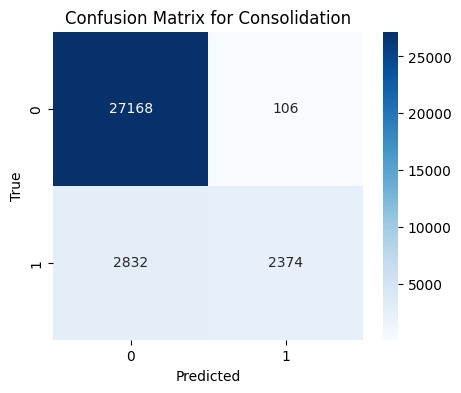

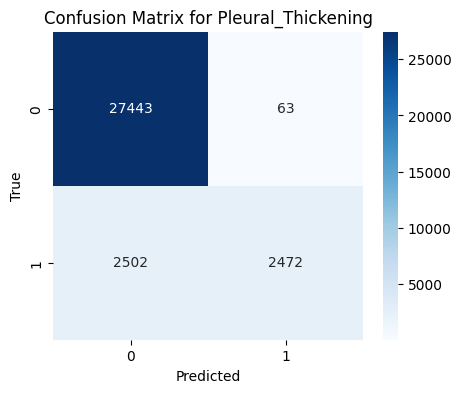

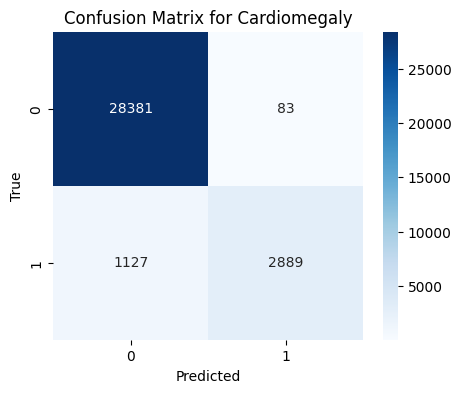

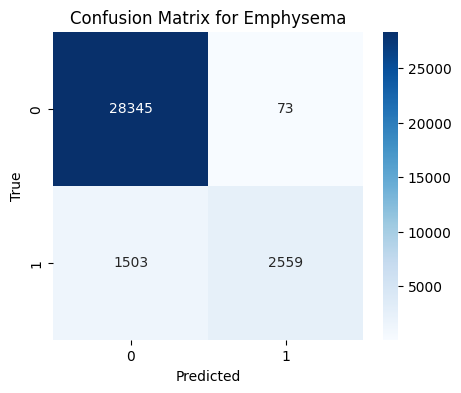

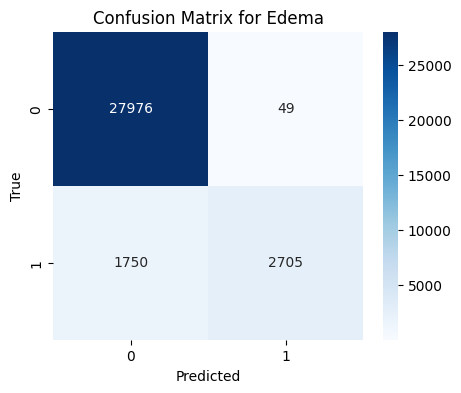

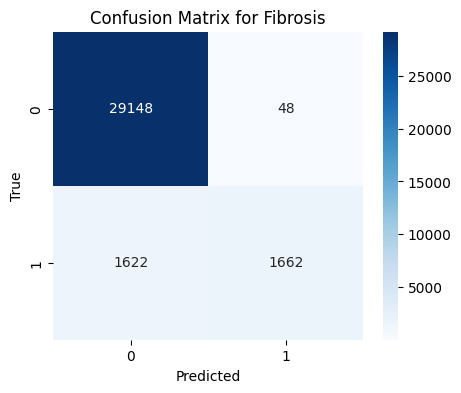

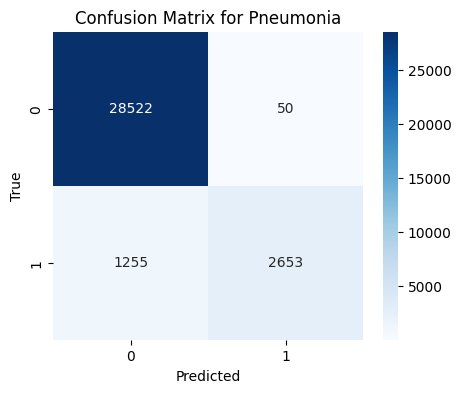

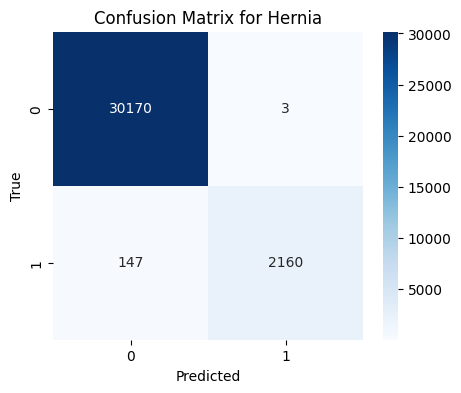

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Misclassified Samples:


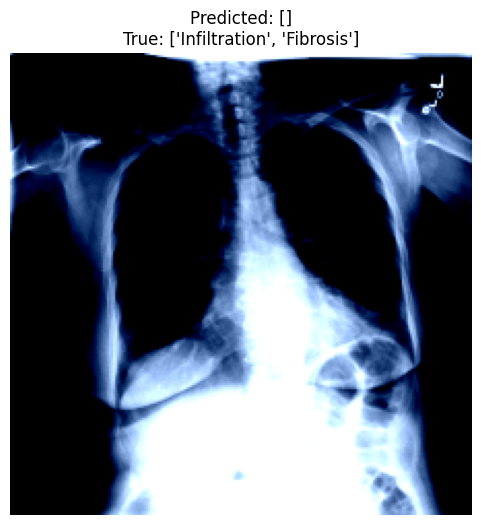

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


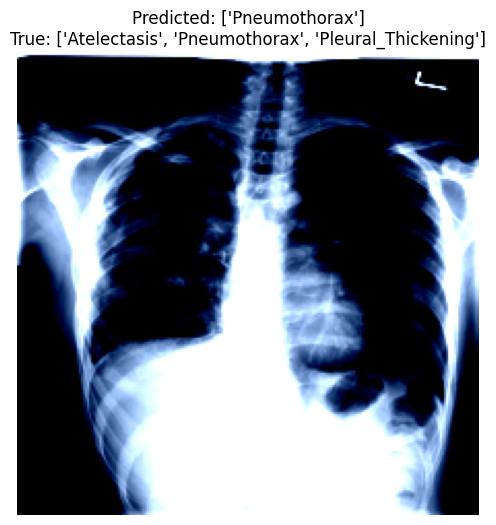

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


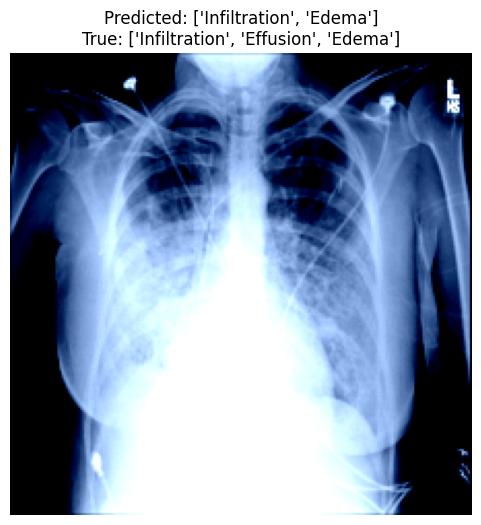

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


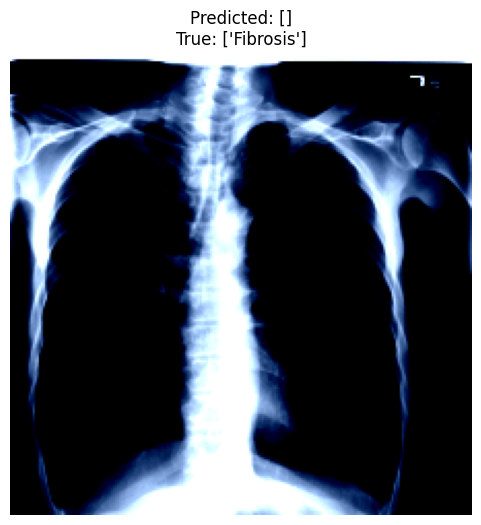

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


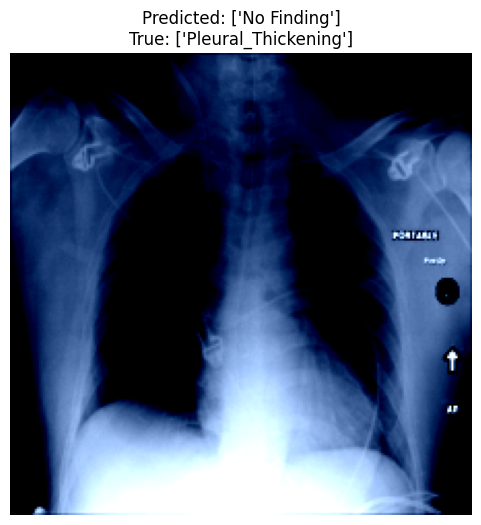

NameError: name 'train_loss' is not defined

<Figure size 1000x600 with 0 Axes>

In [78]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from tqdm import tqdm

# Initialize variables
test_loss = 0.0
correct_test_predictions = 0
total_test_samples = 0

# Track predictions and true labels
all_preds = []
all_labels = []
misclassified_samples = []

# No gradients needed during testing
model.eval()
with torch.no_grad():
    test_pbar = tqdm(test_loader, desc="Testing")
    for images, labels in test_pbar:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Predictions with threshold
        preds = torch.sigmoid(outputs) >= 0.5
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

        # Track misclassified samples
        for i in range(images.size(0)):
            if not torch.equal(preds[i], labels[i]):
                misclassified_samples.append((images[i].cpu(), preds[i].cpu(), labels[i].cpu()))

        # Correct predictions
        correct_test_predictions += (preds == labels).sum().item()
        total_test_samples += labels.size(0) * labels.size(1)

        # Update progress bar
        test_pbar.set_postfix(loss=f"{loss.item():.4f}")

# Combine all predictions and labels
all_preds = torch.cat(all_preds, dim=0)
all_labels = torch.cat(all_labels, dim=0)

# Calculate metrics
avg_test_loss = test_loss / len(test_loader)
test_accuracy = correct_test_predictions / total_test_samples * 100
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(all_labels.numpy(), all_preds.numpy())
for i, matrix in enumerate(conf_matrix):
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {class_names[i]}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot misclassified images
print("\nMisclassified Samples:")
for image, pred, true in misclassified_samples[:5]:  # Display up to 5 examples
    plt.figure(figsize=(6, 6))
    if image.shape[0] == 3:  # RGB image
        plt.imshow(image.permute(1, 2, 0))  # Convert from tensor format
    else:  # Grayscale image
        plt.imshow(image.squeeze(0), cmap='gray')  # Squeeze channel dimension
    plt.axis('off')
    plt.title(f"Predicted: {[class_names[i] for i, p in enumerate(pred) if p == 1]}\n"
              f"True: {[class_names[i] for i, t in enumerate(true) if t == 1]}")
    plt.show()

# Plot loss curve (example: using `train_loss` and `val_loss` lists from training)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Train Loss")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


In [79]:
total_misclassified = len(misclassified_samples)
total_misclassified

22131

In [80]:
len(train_dataset1)

76759